In [66]:
import pandas as pd
import numpy as np
import sqlite3
from datetime import datetime
import time
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import floor, ceil
from pylab import rcParams
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Conv2D, Flatten
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import csv
from torch.autograd import Variable

%matplotlib inline
engine = sqlite3.connect('DB')

In [67]:
allTrain_x = pd.read_sql("""
SELECT *
FROM train_x
""", engine)

allTrain_y = pd.read_sql("""
SELECT *
FROM train_y
""", engine)

test = pd.read_sql("""
SELECT *
FROM test
""", engine)

baseTrain_x = pd.read_sql("""
SELECT *
FROM baseTrain_x
""", engine)

baseTrain_y = pd.read_sql("""
SELECT *
FROM baseTrain_y
""", engine)

train_size = 0.8
train_cnt = floor(allTrain_x.shape[0] * train_size)
allX_train = allTrain_x.iloc[0: train_cnt].values
allY_train = allTrain_y.iloc[0: train_cnt].values
allX_validation = allTrain_x.iloc[train_cnt:].values
allY_validation = allTrain_y.iloc[train_cnt:].values


baseX_train = baseTrain_x.iloc[0: train_cnt].values
baseY_train = baseTrain_y.iloc[0: train_cnt].values
baseX_validation = baseTrain_x.iloc[train_cnt:].values
baseY_validation = baseTrain_y.iloc[train_cnt:].values


In [68]:
baseTrain_x

,Store,Dept,Date,IsHoliday
0,1,1,1265.3460,0
1,1,1,1265.9508,1
2,1,1,1266.5556,0
3,1,1,1267.1604,0
4,1,1,1267.7652,0
5,1,1,1268.3700,0
6,1,1,1268.9712,0
7,1,1,1269.5760,0
8,1,1,1270.1808,0
9,1,1,1270.7856,0


In [48]:
#Start of tensorflow code
# def multilayer_perceptron(x, weights, biases, keep_prob):
#     layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
#     layer_1 = tf.nn.relu(layer_1)
#     layer_1 = tf.nn.dropout(layer_1, keep_prob)
#     out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
#     return out_layer

In [49]:
# n_hidden_1 = 38
# n_input = allTrain_x.shape[1]#15 for 15 columns(the features)
# n_classes = allTrain_y.shape[1]#1 for 1 column(the labels)

# weights = {
#     'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
#     'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
# }

# biases = {
#     'b1': tf.Variable(tf.random_normal([n_hidden_1])),
#     'out': tf.Variable(tf.random_normal([n_classes]))
# }

# keep_prob = tf.placeholder('float')

In [50]:
# training_epochs = 50
# display_step = 10
# batch_size = 32

# x = tf.placeholder('float', [None, n_input])
# y = tf.placeholder('float', [None, n_classes])

In [51]:
# predictions = multilayer_perceptron(x, weights, biases, keep_prob)
# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))
# optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

In [69]:
#Start of Keras code
def baseline_model(lossFunc):
    model = Sequential()
    model.add(Dense(5, input_dim = 4, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal'))
    
    model.compile(loss = lossFunc, optimizer = 'adam', metrics = ['accuracy'])
    return model

In [53]:
def CNN(lossFunc):
    model = Sequential()
    model.add(Conv1D(kernel_size = 2, activation = 'relu', use_bias = True, kernel_initializer = 'normal', filters = 1))
    model.add(Dense(1, kernel_initializer = 'normal'))
    
    model.compile(loss = lossFunc, optimizer = 'adam', metris = ['accuracy'])
    return model

In [54]:
"""
input_dim is number of columns
model.add(Dense(16, input_dim = 16, kernel_initializer = 'normal', activation = 'relu'))
That means it the layer has 16 nodes and expects 16 features(input variables)

model.add(Dense(8, activation='relu'))
This layer has 8 neurons

model.add(Dense(1, activation='sigmoid'))
This layer 1 neuron which you apply the sigmoid function to get an output

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
To compile the model

model.fit(X, Y, epochs=150, batch_size=10)
#Fit model

scores = model.evaluate(test_X, test_Y)
#Test model

"""

"\ninput_dim is number of columns\nmodel.add(Dense(16, input_dim = 16, kernel_initializer = 'normal', activation = 'relu'))\nThat means it the layer has 16 nodes and expects 16 features(input variables)\n\nmodel.add(Dense(8, activation='relu'))\nThis layer has 8 neurons\n\nmodel.add(Dense(1, activation='sigmoid'))\nThis layer 1 neuron which you apply the sigmoid function to get an output\n\nmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])\nTo compile the model\n\nmodel.fit(X, Y, epochs=150, batch_size=10)\n#Fit model\n\nscores = model.evaluate(test_X, test_Y)\n#Test model\n\n"

In [70]:
#Call Keras model using MSE as loss function
theModel = baseline_model('mean_absolute_error')
trainedModel = theModel.fit(baseX_train, baseY_train, validation_data = (baseX_validation, baseY_validation), epochs = 350, batch_size = 150)

Train on 77644 samples, validate on 343926 samples
Epoch 1/350
77644/77644 [==============================] - 1s 18us/step - loss: 16321.0996 - acc: 5.1517e-05 - val_loss: 14666.1982 - val_acc: 8.7228e-06

In [77]:
kerasPredictions = theModel.predict(test)
kerasEvaluation = theModel.evaluate(baseX_validation, baseY_validation)
print(kerasEvaluation)
print(kerasPredictions)
print(baseY_validation)

343926/343926 [==============================] - 3s 9us/step

In [78]:
convertedKerasPredictions = [element[0] for element in kerasPredictions]
createSubmissionFile(submissionTest, convertedKerasPredictions)

In [79]:
#MSE loss vals over epochs for baseline model
def lossValPlot(trainedModel):
    lossVals = trainedModel.history['loss']
    epochList = [x for x in range(len(lossVals))]
    plt.title('Mean Squared Error Loss')
    plt.plot(epochList, lossVals)
    plt.show()

def lossDifferencePlot():
    lossDifferences = []
    temp = lossVals[2:]
    for i in range(len(lossVals)):
        lossDifferences.append(lossVals[i] - lossVals[i - 1])
    x = 2
    lossDifferences = []
    while(x < len(temp)):
        lossDifferences.append(temp[x] - temp[x - 1])
        x += 1
    epochList = [x for x in range(len(lossDifferences))]
    plt.title('MSE loss function differences')
    plt.plot(epochList, lossDifferences)
    plt.show()


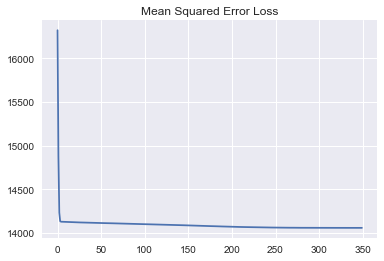

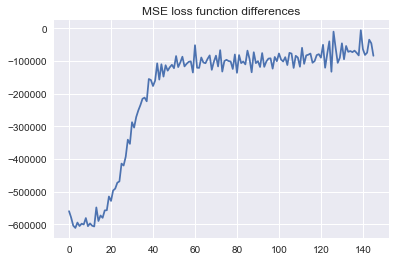

In [83]:
lossValPlot(trainedModel)
lossDifferencePlot()

In [204]:
#Pytorch training code
trainingData = allTrain_x.values
labelsData = allTrain_y.values
testData = test.values
X = torch.tensor(trainingData)
y = torch.tensor(labelsData)

In [9]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [15]:
baseX_train

array([[1.0000000e+00, 1.0000000e+00, 1.2653568e+03, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.2659616e+03, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.2665664e+03, 0.0000000e+00],
       ...,
       [8.0000000e+00, 9.1000000e+01, 1.2792636e+03, 0.0000000e+00],
       [8.0000000e+00, 9.1000000e+01, 1.2798684e+03, 0.0000000e+00],
       [8.0000000e+00, 9.1000000e+01, 1.2804732e+03, 0.0000000e+00]])

In [43]:
net = Net(n_feature= 4, n_hidden=4, n_output= 1)     # define the network
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()
plt.ion()

#Converting data to torch form for training
torchTrainX = Variable(torch.from_numpy(baseX_train)).float()
torchTrainY = Variable(torch.from_numpy(baseY_train)).float()
torchValidationX = Variable(torch.from_numpy(baseX_validation)).float()
torchValidationY = Variable(torch.from_numpy(baseY_validation)).float()

for t in range(150):
    prediction = net(torchTrainX)
    
    loss = loss_func(prediction, torchTrainY)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

#Do stuff without computing gradient
with torch.no_grad():
    predictions = net(torchValidationX)
    print(predictions)
    

tensor([[16786.4238],
        [16786.4238],
        [16786.4238],
        ...,
        [16786.4238],
        [16786.4238],
        [16786.4238]])


In [21]:
# class Neural_Network(nn.Module):
#     def __init__(self, ):
#         super(Neural_Network, self).__init__()
#         # parameters
#         # TODO: parameters can be parameterized instead of declaring them here
#         self.inputSize = 4
#         self.outputSize = 1
#         self.hiddenSize = 2
        
#         # weights
#         self.W1 = torch.randn(self.inputSize, self.hiddenSize) # 3 X 2 tensor
#         self.W2 = torch.randn(self.hiddenSize, self.outputSize) # 3 X 1 tensor
        
#     def forward(self, X):
#         self.z = torch.matmul(X, self.W1) # 3 X 3 ".dot" does not broadcast in PyTorch
#         self.z2 = self.sigmoid(self.z) # activation function
#         self.z3 = torch.matmul(self.z2, self.W2)
#         o = self.sigmoid(self.z3) # final activation function
#         return o
        
#     def sigmoid(self, s):
#         return 1 / (1 + torch.exp(-s))
    
#     def sigmoidPrime(self, s):
#         # derivative of sigmoid
#         return s * (1 - s)
    
#     def backward(self, X, y, o):
#         self.o_error = y - o # error in output
#         self.o_delta = self.o_error * self.sigmoidPrime(o) # derivative of sig to error
#         self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
#         self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
#         self.W1 += torch.matmul(torch.t(X), self.z2_delta)
#         self.W2 += torch.matmul(torch.t(self.z2), self.o_delta)
        
#     def train(self, X, y):
#         # forward + backward pass for training
#         o = self.forward(X)
#         self.backward(X, y, o)
        
#     def saveWeights(self, model):
#         # we will use the PyTorch internal storage functions
#         torch.save(model, "NN")
#         # you can reload model with all the weights and so forth with:
#         # torch.load("NN")
        
#     def predict(self):
#         print ("Predicted data based on trained weights: ")
#         print ("Input (scaled): \n" + str(xPredicted))
#         print ("Output: \n" + str(self.forward(xPredicted)))

In [74]:
#SKLearn RandomForest
regr = RandomForestRegressor()
regr.fit(baseX_train, baseY_train)
print(regr.score(baseX_validation, baseY_validation))

/Users/CraigFan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.4555207903529229


In [75]:
submissionTest = pd.read_csv('./test.csv')
def createId(row):
    return str(row['Store']) + '_' + str(row['Dept']) + '_' + str(row['Date'])
submissionTest['Id'] = submissionTest.apply(lambda row: createId(row), axis = 1)

In [76]:
def createSubmissionFile(submissionTest, predictions):
    index = []
    for i in range(len(predictions)):
        index.append(i + 1)

    predictionToCSV = np.asarray(predictions)
    indexToCSV = np.asarray(index)

    combined = []
    for i in range(len(predictions)):
        combined.append([submissionTest['Id'].iloc[i], predictionToCSV[i]])

    combined = np.asarray(combined)
    np.savetxt('predictions.csv', combined, delimiter = ",", header = 'Id,Weekly_Sales', fmt = '%s')

predictions = regr.predict(test)

createSubmissionFile(submissionTest, predictions)


In [65]:
len(predictions)

343926